<a href="https://colab.research.google.com/github/Bryan-Az/CMPE-255-HW2/blob/main/PyCaret_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 484.4/484.4 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.4/153.4 kB 18.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.8/81.8 kB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 18.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.5/17.5 MB 21.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 30.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 45.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 44.6 MB/s eta 0:0

In [ ]:
import pandas as pd #these two packages are useful for the whole assignment
import pycaret

## Classification

### Binary Classification

#### Setup Stage

In [ ]:
from pycaret.classification import * #these packages are useful for the classification section of this assignment
from pycaret.classification import ClassificationExperiment

In [ ]:
#importing the prepared image metadata from the National Gallery of Arts OpenData program (a Creative Commons github repo)
latinamerican_art = pd.read_csv('latinamerican_art.csv', error_bad_lines=False, warn_bad_lines=False)
non_latinamerican_art = pd.read_csv('non_latinamerican_art.csv',  error_bad_lines=False, warn_bad_lines=False)

In [ ]:
#As you can see we have a very small latin american dataset of artwork for which we wish to identify and classify
print(latinamerican_art.shape)
print(non_latinamerican_art.shape)

(628, 40)
(14068, 40)


In [ ]:
# I will create the Y-feature (is_latinamerican) as a Boolean (0/1)
latinamerican_art['is_latinamerican'] = [1] * len(latinamerican_art)
non_latinamerican_art['is_latinamerican'] = [0] * len(non_latinamerican_art)
# I will concatenate the datasets so the algorithm can randomize and split for generalized training
nga_artwork_metadata = pd.concat([latinamerican_art, non_latinamerican_art])
nga_artwork_metadata.reset_index(drop=True, inplace=True)

In [ ]:
classify_artwork_setup = setup(nga_artwork_metadata, target = 'is_latinamerican', session_id=777)

,Description,Value
0,Session id,6130
1,Target,is_latinamerican
2,Target type,Binary
3,Original data shape,"(14696, 41)"
4,Transformed data shape,"(14696, 116)"
5,Transformed train set shape,"(10287, 116)"
6,Transformed test set shape,"(4409, 116)"
7,Numeric features,8
8,Categorical features,32
9,Rows with missing values,100.0%


In [ ]:
classification_isLatinAmerican_artwork = ClassificationExperiment()


In [ ]:
classification_isLatinAmerican_artwork.setup(nga_artwork_metadata, target='is_latinamerican', session_id = 777)

,Description,Value
0,Session id,777
1,Target,is_latinamerican
2,Target type,Binary
3,Original data shape,"(14696, 41)"
4,Transformed data shape,"(14696, 126)"
5,Transformed train set shape,"(10287, 126)"
6,Transformed test set shape,"(4409, 126)"
7,Numeric features,8
8,Categorical features,32
9,Rows with missing values,100.0%


#### Model Selection Stage

In [ ]:
model_classification_isLatinAmerican_artwork = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dt,Decision Tree Classifier,0.8000,0.8000,0.8000,0.8000,0.8000,0.8000,0.8000,4.0500
ridge,Ridge Classifier,0.8000,0.0000,0.8000,0.8000,0.8000,0.8000,0.8000,3.3940
qda,Quadratic Discriminant Analysis,0.8000,0.8000,0.8000,0.8000,0.8000,0.8000,0.8000,3.8800
ada,Ada Boost Classifier,0.8000,0.8000,0.8000,0.8000,0.8000,0.8000,0.8000,3.5450
lda,Linear Discriminant Analysis,0.8000,0.8000,0.8000,0.8000,0.8000,0.8000,0.8000,3.9000
et,Extra Trees Classifier,0.8000,0.8000,0.8000,0.8000,0.8000,0.8000,0.8000,4.4370
xgboost,Extreme Gradient Boosting,0.8000,0.8000,0.8000,0.8000,0.8000,0.8000,0.8000,4.5920
rf,Random Forest Classifier,0.7995,0.8000,0.7886,0.8000,0.7942,0.7939,0.7940,4.3450
gbc,Gradient Boosting Classifier,0.7993,0.8000,0.7841,0.8000,0.7919,0.7915,0.7916,4.8950
lr,Logistic Regression,0.7913,0.7651,0.6000,0.6000,0.6000,0.5998,0.5993,8.8730


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

From the looks of the above stage, due to the lack of sufficient data in the target class, ~(600/200600 rows), there are many classifiers which overfit. Given we have many models to choose from, I would pick the KNN/RandomForest/GradientBoosting Classifier as the 'best' considering the limitations. This model has high Recall/Precision/Accuracy, without overfitting. Now we will move on to visualizing the model performance before moving on to the next stage. There are many visualizations and metrics to tinker with, but for the purposes of this assignment and my own interest working with the features - I want to see which features have the best importance to the estimator.

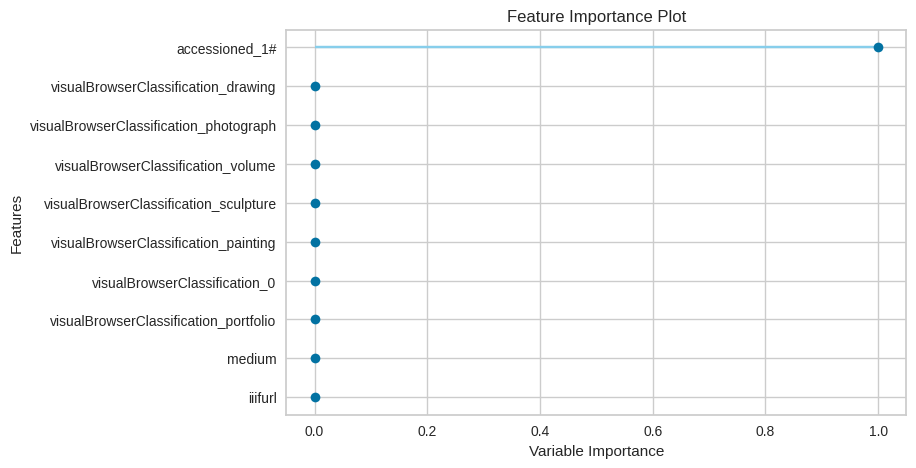

In [ ]:
plot_model(model_classification_isLatinAmerican_artwork, plot='feature')

The above plot shows that the top feature is artistofngaobject/accessioned(the name of the artist), artistofngaobject is simply a boolean if the display name is the actual name of the artist, this seems to be the model detecting people and using them as a key to determining if they are latinamerican - which I see being a good sign. However, the following confusion matrix validates my assumption that it is overfitting. PyCaret seems to choose the overfit models rather than the KNN.

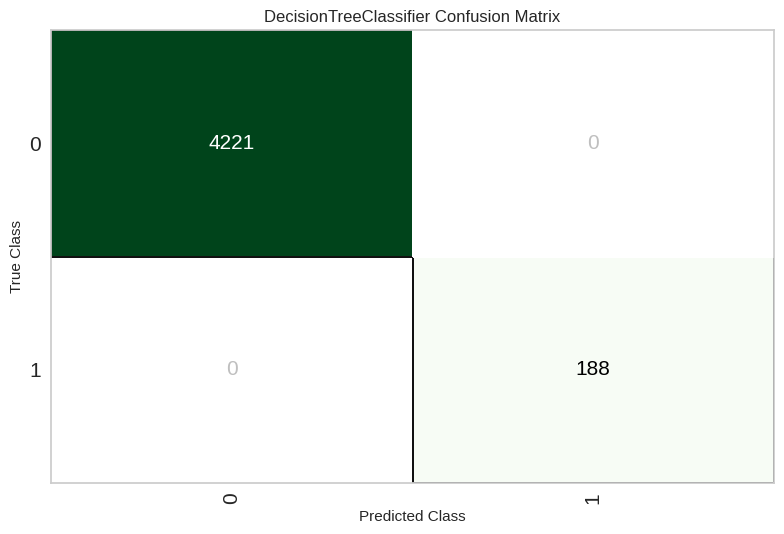

In [ ]:
plot_model(model_classification_isLatinAmerican_artwork, plot='confusion_matrix')

###Multiclass Classification

#### Setup Stage

In [ ]:
#dropping the artistofnga feature in the dataset to check if this makes a difference
nga_artwork_metadata = nga_artwork_metadata.drop('artistofngaobject', axis=1)

In [ ]:
nga_artwork_metadata.columns

Index(['iiifurl', 'iiifthumburl', 'accessioned', 'title',
       'displayDate_created', 'roletype', 'role', 'forwarddisplayname',
       'birthyear', 'deathyear', 'ulanid', 'nationality', 'constituenttype',
       'beginyear_artistAssigned', 'endyear_artistAssigned',
       'country_artistAssigned', 'zipcode_artistAssigned', 'medium',
       'dimensions', 'inscription', 'markings', 'attribution',
       'visualBrowserClassification', 'parentID', 'isVirtual', 'portfolio',
       'series', 'volume', 'watermarks', 'uuid', 'viewtype', 'sequence',
       'width', 'height', 'maxpixels', 'assistivetext', 'depictstmsobjectid',
       'objectid', 'constituentid', 'is_latinamerican'],
      dtype='object')

In [ ]:
nga_artwork_metadata = nga_artwork_metadata.where(nga_artwork_metadata.visualBrowserClassification.notna()).dropna(how='all')

In [ ]:
nga_artwork_metadata.shape #using medium as the target variable reduced the overall size of the dataset

(14635, 41)

In [ ]:
nga_artwork_metadata.is_latinamerican.value_counts() #luckily, it only shrank the non_latinamerican_set!

0.0    14007
1.0      628
Name: is_latinamerican, dtype: int64

In [ ]:
categorical_artFeatures = ['depictstmsobjectid', 'maxpixels','height', 'width', 'sequence','zipcode_artistAssigned','isVirtual','parentID','endyear_artistAssigned','beginyear_artistAssigned','ulanid','deathyear','birthyear','accessioned','iiifurl', 'iiifthumburl','title', 'displayDate_created', 'roletype', 'role', 'forwarddisplayname', 'nationality', 'constituenttype', 'country_artistAssigned', 'dimensions', 'inscription', 'markings', 'attribution','medium', 'portfolio', 'series', 'volume', 'watermarks', 'uuid', 'viewtype', 'assistivetext']
numerical_artFeatures = ['objectid', 'constituentid', 'is_latinamerican']

In [ ]:
dtype_dict = {col: 'float64' for col in numerical_artFeatures}
dtype_dict.update({col: 'category' for col in categorical_artFeatures})

In [ ]:
nga_artwork_metadata = nga_artwork_metadata.astype(dtype_dict)

In [ ]:
#given our dataset has shrank, we might see less overfitting
multiclass_medium_artwork_setup = setup(nga_artwork_metadata, target = 'visualBrowserClassification', session_id = 777, numeric_features=numeric_artfeatures, categorical_features=categorical_artFeatures)

,Description,Value
0,Session id,777
1,Target,visualBrowserClassification
2,Target type,Multiclass
3,Target mapping,"lower right corner: 0, typed on Museum of Modern Art sticker: 40.5022 / Stieglitz; upper right: 1, upper right in graphite: X-BAB.005; lower right: ICP 1981.1145 GT: 2, 0: 3, 173333: 4, decorative art: 5, drawing: 6, new media: 7, painting: 8, photograph: 9, portfolio: 10, print: 11, sculpture: 12, technical material: 13, volume: 14"
4,Original data shape,"(14635, 41)"
5,Transformed data shape,"(14635, 58)"
6,Transformed train set shape,"(10244, 58)"
7,Transformed test set shape,"(4391, 58)"
8,Ordinal features,1
9,Numeric features,9


In [ ]:
multiclass_medium_artwork = ClassificationExperiment()

In [ ]:
multiclass_medium_artwork.setup(nga_artwork_metadata, target = 'visualBrowserClassification', session_id = 777, numeric_features=numerical_artfeatures, categorical_features=categorical_artFeatures)

,Description,Value
0,Session id,777
1,Target,visualBrowserClassification
2,Target type,Multiclass
3,Target mapping,"lower right corner: 0, typed on Museum of Modern Art sticker: 40.5022 / Stieglitz; upper right: 1, upper right in graphite: X-BAB.005; lower right: ICP 1981.1145 GT: 2, 0: 3, 173333: 4, decorative art: 5, drawing: 6, new media: 7, painting: 8, photograph: 9, portfolio: 10, print: 11, sculpture: 12, technical material: 13, volume: 14"
4,Original data shape,"(14635, 41)"
5,Transformed data shape,"(14635, 58)"
6,Transformed train set shape,"(10244, 58)"
7,Transformed test set shape,"(4391, 58)"
8,Ordinal features,1
9,Numeric features,9


#### Model Selection Stage

In [ ]:
model_multiclass_medium_artwork = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dummy,Dummy Classifier,0.4201,0.0000,0.4201,0.1961,0.2674,0.0000,0.0000,6.0570


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

From the above output, it seems like there was an issue training the other models, and the only model to be used is the dummy model. The dummy model is only used for baseline comparisons and is not a real model. Given this information, in the future, I would try to troubleshoot why the other models could not be trained - it seems there may be high cardinality in the medium/visualBrowserClassifications, and some feature engineering may be needed. Due to this issue, visualizations cannot be made so I will be moving on to the next stage in data analysis.

## Regression

### Setup Stage

In [ ]:
from pycaret.regression import * #this is necessary to run a regression model with pycaret (any class)
from pycaret.regression import RegressionExperiment #this will import the regression experiment class

For this section, I will be using the 'real year' feature of the global housing kaggle dataset. This feature is noted as being the nominal price series deflated by the consumer price index. I assume this means that this feature is normalized, and may be better for comparing housing growth rates between countries having varying levels of housing prices.

In [ ]:
house_prices = pd.read_csv('real-year_dropna.csv') #this is the 'clean' version of the dataset and null values for real-year are dropped

In [ ]:
house_prices.tail()

,date,country,price
4312,2017-09-30,Netherlands,7.14
4313,2017-09-30,Norway,0.96
4314,2017-09-30,Thailand,-0.22
4315,2017-09-30,Turkey,0.68
4316,2017-09-30,South Africa,-0.99


In [ ]:
regress_setup = setup(house_prices, target = 'price', session_id = 777)

,Description,Value
0,Session id,777
1,Target,price
2,Target type,Regression
3,Original data shape,"(4317, 3)"
4,Transformed data shape,"(4317, 3)"
5,Transformed train set shape,"(3021, 3)"
6,Transformed test set shape,"(1296, 3)"
7,Categorical features,2
8,Preprocess,True
9,Imputation type,simple


In [ ]:
regressGlobalHouseTrends = RegressionExperiment()

In [ ]:
regressGlobalHouseTrends.setup(house_prices, target='price', session_id = 777)

,Description,Value
0,Session id,777
1,Target,price
2,Target type,Regression
3,Original data shape,"(4317, 3)"
4,Transformed data shape,"(4317, 3)"
5,Transformed train set shape,"(3021, 3)"
6,Transformed test set shape,"(1296, 3)"
7,Categorical features,2
8,Preprocess,True
9,Imputation type,simple


### Model Selection Stage

In [ ]:
models_regression_GlobalHouseTrends = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,5.7008,67.3214,8.1844,0.1745,0.9824,2.5724,0.3900
lightgbm,Light Gradient Boosting Machine,5.6257,67.7366,8.2135,0.1663,0.9185,2.5038,0.9090
en,Elastic Net,5.9311,72.7907,8.5097,0.1095,1.0011,2.3921,0.1070
lasso,Lasso Regression,5.9380,72.8138,8.5112,0.1091,1.0013,2.4099,0.2130
llar,Lasso Least Angle Regression,5.9380,72.8138,8.5112,0.1091,1.0013,2.4099,0.1020
huber,Huber Regressor,5.9037,72.9554,8.5186,0.1078,1.0015,2.2757,0.1200
br,Bayesian Ridge,5.9840,73.3519,8.5445,0.1009,0.9873,2.5779,0.1060
lar,Least Angle Regression,5.9855,73.3700,8.5456,0.1007,0.9870,2.5818,0.1110
lr,Linear Regression,5.9855,73.3700,8.5456,0.1007,0.9870,2.5818,0.7590
ridge,Ridge Regression,5.9854,73.3695,8.5456,0.1007,0.9870,2.5817,0.1880


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

From the looks of the above stage, the gradient boosting regressor works best. Now we will move on to visualizing the model performance before moving on to the next stage.

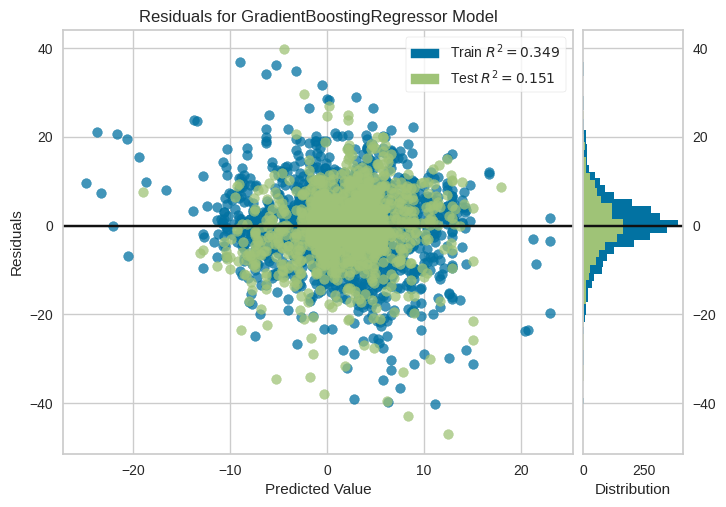

In [ ]:
plot_model(models_regression_GlobalHouseTrends, plot = 'residuals')

The above plot shows the difference in R^2 in the scoring of the regression model on the test/train split of the data. As the model scored 0.151 on the test split, the model is closer to 0 therefore the country and date features are not contributing as much to the estimator as imagined, and the variance in the price may be due to other features not present within the data.

## Clustering

In [ ]:
from pycaret.clustering import *
from pycaret.clustering import ClusteringExperiment

In [ ]:
import pandas as pd

###Setup Stage

For this section, I want to cluster the image sizes of the data in the artwork dataset. Due to the issue seen in the multiclass classification, there may be too many columns and rows that make it computationally expensive and so I will feature engineer the columns and select a smaller subset to hopefully train some models (not just the dummy model).

In [ ]:
#importing the prepared image metadata from the National Gallery of Arts OpenData program (a Creative Commons github repo)
latinamerican_art = pd.read_csv('latinamerican_art.csv', error_bad_lines=False, warn_bad_lines=False)
non_latinamerican_art = pd.read_csv('non_latinamerican_art.csv',  error_bad_lines=False, warn_bad_lines=False)
# I will create the Y-feature (is_latinamerican) as a Boolean (0/1)
latinamerican_art['is_latinamerican'] = [1] * len(latinamerican_art)
non_latinamerican_art['is_latinamerican'] = [0] * len(non_latinamerican_art)
# I will concatenate the datasets so the algorithm can randomize and split for generalized training
nga_artwork_metadata = pd.concat([latinamerican_art, non_latinamerican_art])

In [ ]:
categorical_artFeatures = ['depictstmsobjectid', 'maxpixels','height', 'width', 'sequence','zipcode_artistAssigned','isVirtual','parentID','endyear_artistAssigned','beginyear_artistAssigned','ulanid','deathyear','birthyear','accessioned','iiifurl', 'iiifthumburl','title', 'displayDate_created', 'roletype', 'role', 'forwarddisplayname', 'nationality', 'constituenttype', 'country_artistAssigned', 'dimensions', 'inscription', 'markings', 'attribution','medium', 'portfolio', 'series', 'volume', 'watermarks', 'uuid', 'viewtype', 'assistivetext']
numerical_artFeatures = ['objectid', 'constituentid', 'is_latinamerican']

In [ ]:
dtype_dict = {col: 'float64' for col in numerical_artFeatures}
dtype_dict.update({col: 'category' for col in categorical_artFeatures})

In [ ]:
nga_artwork_metadata = nga_artwork_metadata.astype(dtype_dict)

In [ ]:
nga_artwork_metadata.reset_index(drop=True, inplace=True)

In [ ]:
nga_artwork_cluster_cols = ['maxpixels', 'height', 'width', 'dimensions']

In [ ]:
cluster_dtypes = {col: 'category' for col in nga_artwork_cluster_cols}

In [ ]:
cluster_dtypes.update({col: 'float64' for col in ['is_latinamerican']})

In [ ]:
nga_artwork_metadata_imgsizes = nga_artwork_metadata.loc[:, nga_artwork_cluster_cols]

In [ ]:
nga_artwork_metadata_imgsizes.shape

(200701, 5)

In [ ]:
nga_artwork_metadata_imgsizes_reduced = nga_artwork_metadata_imgsizes.sample(n=5000)

In [ ]:
nga_artwork_metadata_imgsizes_reduced = nga_artwork_metadata_imgsizes_reduced.astype(cluster_dtypes)

In [ ]:
nga_artwork_metadata_imgsizes_reduced = nga_artwork_metadata_imgsizes_reduced.where(nga_artwork_metadata_imgsizes_reduced.maxpixels.apply(lambda x: isinstance(x, float))).dropna(how='all')

In [ ]:
nga_artwork_metadata_imgsizes_reduced = nga_artwork_metadata_imgsizes_reduced.where(nga_artwork_metadata_imgsizes_reduced.width.apply(lambda x: not isinstance(x, str))).dropna(how='all')

In [ ]:
nga_artwork_metadata_imgsizes_reduced.shape

(1197, 5)

In [ ]:
clustering_artwork_setup = setup(nga_artwork_metadata_imgsizes_reduced, session_id = 777, numeric_features=['is_latinamerican', 'height', 'maxpixels', 'width'], categorical_features=['dimensions'])

,Description,Value
0,Session id,777
1,Original data shape,"(1197, 5)"
2,Transformed data shape,"(1197, 896)"
3,Numeric features,4
4,Categorical features,1
5,Rows with missing values,19.8%
6,Preprocess,True
7,Imputation type,simple
8,Numeric imputation,mean
9,Categorical imputation,mode


In [ ]:
clustering_imgsizes_artwork = ClusteringExperiment()

In [ ]:
clustering_imgsizes_artwork.setup(nga_artwork_metadata_imgsizes_reduced, session_id=777, numeric_features=['is_latinamerican', 'height', 'maxpixels', 'width'], categorical_features=['dimensions'])

,Description,Value
0,Session id,777
1,Original data shape,"(1197, 5)"
2,Transformed data shape,"(1197, 896)"
3,Numeric features,4
4,Categorical features,1
5,Rows with missing values,19.8%
6,Preprocess,True
7,Imputation type,simple
8,Numeric imputation,mean
9,Categorical imputation,mode


In [ ]:
kmeans_cluster_imgsizes_artwork = create_model('kmeans')

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.7351,1601.6785,0.7800,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

In [ ]:
models()

,Name,Reference
ID,,
kmeans,K-Means Clustering,sklearn.cluster._kmeans.KMeans
ap,Affinity Propagation,sklearn.cluster._affinity_propagation.Affinity...
meanshift,Mean Shift Clustering,sklearn.cluster._mean_shift.MeanShift
sc,Spectral Clustering,sklearn.cluster._spectral.SpectralClustering
hclust,Agglomerative Clustering,sklearn.cluster._agglomerative.AgglomerativeCl...
dbscan,Density-Based Spatial Clustering,sklearn.cluster._dbscan.DBSCAN
optics,OPTICS Clustering,sklearn.cluster._optics.OPTICS
birch,Birch Clustering,sklearn.cluster._birch.Birch


In [ ]:
meanshift_cluster_imgsizes_artwork = create_model('meanshift')

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.6342,690.9084,0.4217,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

In [ ]:
kmeans_cluster_imgsizes_artwork_assign_labels = assign_model(kmeans_cluster_imgsizes_artwork)

In [ ]:
plot_model(kmeans_cluster_imgsizes_artwork, plot = 'cluster')

The above PCA plot of the cluster shows that the data is mostly clustered into groups of 3, showing that there may be 3 main common categories in image size and dimensions and culture (whether latinamerican or not). There are 2 more groups on the farther end, and these may be more uncommon.

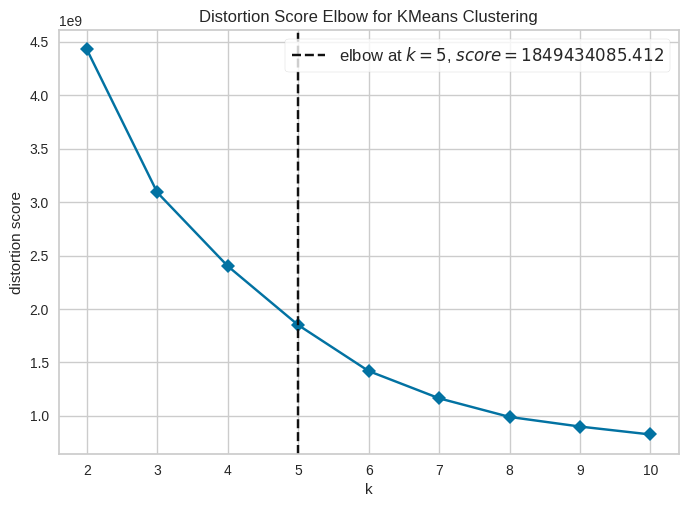

In [ ]:
plot_model(kmeans_cluster_imgsizes_artwork, plot = 'elbow')

The above elbow plot confirms my suspicions, and it shows that 5 is a good value to cluster the datapoints into. Looking at these two plots can help evaluate the categories we may create when applying the model onto the data for prediction purposes.

### Model Selection Stage

## Anomaly Detection

### Setup Stage

In [54]:
from pycaret.anomaly import *
from pycaret.anomaly import AnomalyExperiment

In [55]:
anomaly_imgsizes_artwork_setup = setup(nga_artwork_metadata_imgsizes_reduced, session_id = 777, numeric_features=['is_latinamerican', 'height', 'maxpixels', 'width'], categorical_features=['dimensions'])

,Description,Value
0,Session id,777
1,Original data shape,"(1197, 5)"
2,Transformed data shape,"(1197, 896)"
3,Numeric features,4
4,Categorical features,1
5,Rows with missing values,19.8%
6,Preprocess,True
7,Imputation type,simple
8,Numeric imputation,mean
9,Categorical imputation,mode


In [56]:
anomaly_imgsizes_artwork = AnomalyExperiment()

In [57]:
anomaly_imgsizes_artwork.setup(nga_artwork_metadata_imgsizes_reduced, session_id=777, numeric_features=['is_latinamerican', 'height', 'maxpixels', 'width'], categorical_features=['dimensions'])

,Description,Value
0,Session id,777
1,Original data shape,"(1197, 5)"
2,Transformed data shape,"(1197, 896)"
3,Numeric features,4
4,Categorical features,1
5,Rows with missing values,19.8%
6,Preprocess,True
7,Imputation type,simple
8,Numeric imputation,mean
9,Categorical imputation,mode


### Model Selection Stage

In [58]:
iforest_anomaly_imgsizes_artwork = create_model('iforest')

Processing:   0%|          | 0/3 [00:00<?, ?it/s]

In [59]:
models()

,Name,Reference
ID,,
abod,Angle-base Outlier Detection,pyod.models.abod.ABOD
cluster,Clustering-Based Local Outlier,pycaret.internal.patches.pyod.CBLOFForceToDouble
cof,Connectivity-Based Local Outlier,pyod.models.cof.COF
iforest,Isolation Forest,pyod.models.iforest.IForest
histogram,Histogram-based Outlier Detection,pyod.models.hbos.HBOS
knn,K-Nearest Neighbors Detector,pyod.models.knn.KNN
lof,Local Outlier Factor,pyod.models.lof.LOF
svm,One-class SVM detector,pyod.models.ocsvm.OCSVM
pca,Principal Component Analysis,pyod.models.pca.PCA


In [60]:
iforest_anomaly_imgsizes_artwork_assign_labels = assign_model(iforest_anomaly_imgsizes_artwork)

In [62]:
plot_model(iforest_anomaly_imgsizes_artwork, plot = 'tsne')

As you can see in the above interactive 3d pca plot, there is not that many outliers and the datapoints tend to travel in paths linearly. However, there are clusters of datapoints that do not trend any particular path and this is where most of the anomalies are found. 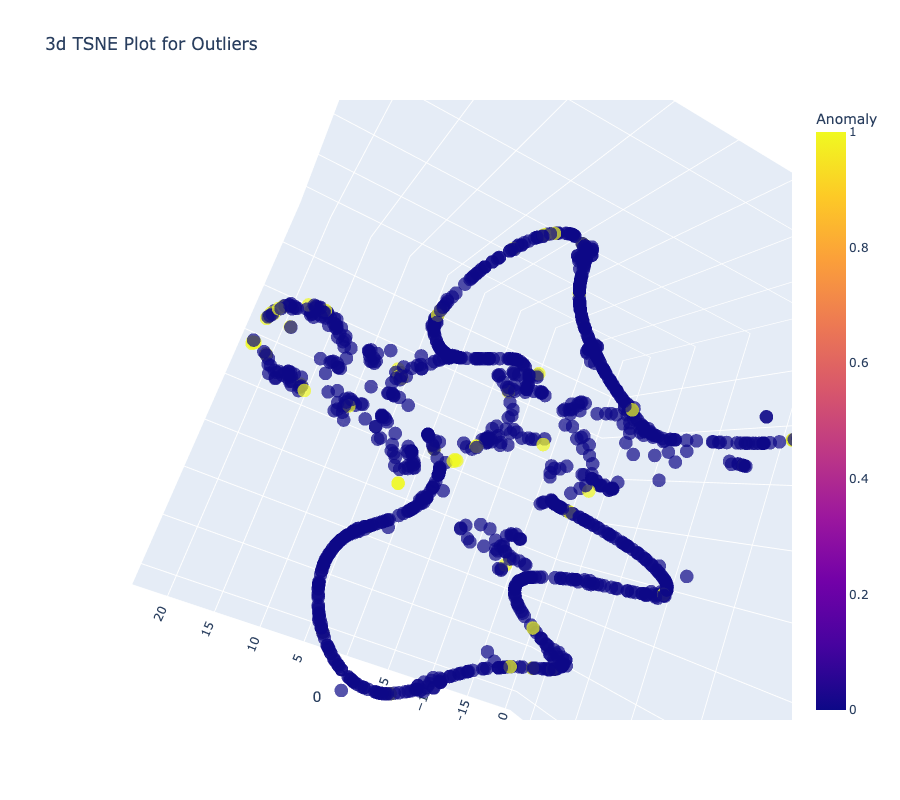

## Association Rules Mining

## Time Series Forecasting - Univariate without Exogenous Variables

### Setup Stage

In [99]:
from pycaret.time_series import *
from pycaret.time_series import TSForecastingExperiment

In [63]:
house_prices = pd.read_csv('real-year_dropna.csv')

In [69]:
print(house_prices.price.apply(pd.isna).sum())
print(house_prices.date.apply(pd.isna).sum())

0
0


In [91]:
#only forecasting information for the U.S
usa_time_prices = house_prices.where(house_prices.country == 'United States').dropna(how='all')

In [94]:
usa_time_prices.date = pd.to_datetime(usa_time_prices.date)

In [95]:
usa_time_prices.drop('country', axis=1, inplace=True)

In [96]:
usa_time_prices.set_index('date', inplace=True)

<Axes: xlabel='date'>

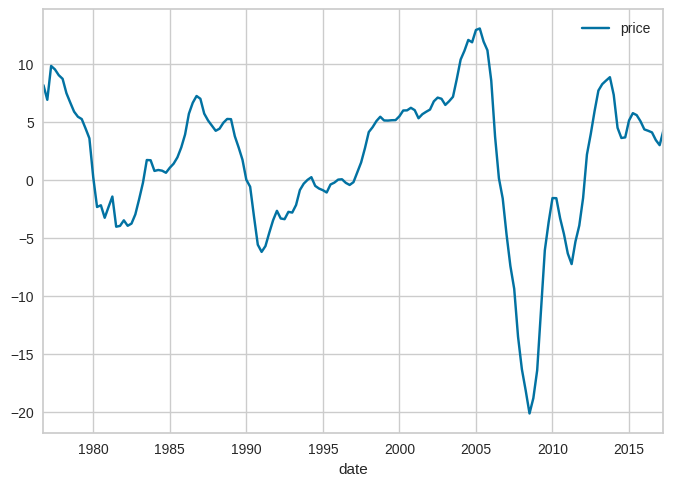

In [97]:
usa_time_prices.plot()

In [100]:
tseries_usa_home_prices_setup = setup(usa_time_prices, fh = 2, session_id = 777) # im using a forecast horizon of 2 datapoints to chunck in fewer groups as many countries dont have as much data

,Description,Value
0,session_id,777
1,Target,price
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Original data shape,"(163, 1)"
5,Transformed data shape,"(163, 1)"
6,Transformed train set shape,"(161, 1)"
7,Transformed test set shape,"(2, 1)"
8,Rows with missing values,0.0%
9,Fold Generator,ExpandingWindowSplitter


In [101]:
tseries_usa_home_prices = TSForecastingExperiment()

In [102]:
tseries_usa_home_prices.setup(usa_time_prices, fh = 2, session_id = 777)

,Description,Value
0,session_id,777
1,Target,price
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Original data shape,"(163, 1)"
5,Transformed data shape,"(163, 1)"
6,Transformed train set shape,"(161, 1)"
7,Transformed test set shape,"(2, 1)"
8,Rows with missing values,0.0%
9,Fold Generator,ExpandingWindowSplitter


### Model Selection Stage

In [103]:
model_tseries_usa_home_prices = compare_models()

,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2,TT (Sec)
en_cds_dt,Elastic Net w/ Cond. Deseasonalize & Detrending,0.1254,0.0954,0.2420,0.2584,0.0586,0.0565,-11.6746,0.1300
lasso_cds_dt,Lasso w/ Cond. Deseasonalize & Detrending,0.1306,0.0993,0.2520,0.2690,0.0609,0.0586,-13.1036,0.1233
llar_cds_dt,Lasso Least Angular Regressor w/ Cond. Deseasonalize & Detrending,0.1306,0.0993,0.2520,0.2690,0.0609,0.0586,-13.1036,0.1367
ridge_cds_dt,Ridge w/ Cond. Deseasonalize & Detrending,0.1663,0.1292,0.3223,0.3511,0.0701,0.0685,-8.1789,0.1300
br_cds_dt,Bayesian Ridge w/ Cond. Deseasonalize & Detrending,0.1669,0.1297,0.3235,0.3526,0.0703,0.0687,-8.3089,0.1167
lr_cds_dt,Linear w/ Cond. Deseasonalize & Detrending,0.1679,0.1307,0.3256,0.3554,0.0707,0.0691,-8.5386,0.3000
omp_cds_dt,Orthogonal Matching Pursuit w/ Cond. Deseasonalize & Detrending,0.1790,0.1516,0.3455,0.4107,0.0840,0.0788,-27.8239,0.1267
huber_cds_dt,Huber w/ Cond. Deseasonalize & Detrending,0.1959,0.1530,0.3799,0.4158,0.0828,0.0785,-5.6347,0.1233
auto_arima,Auto ARIMA,0.2249,0.1788,0.4355,0.4857,0.0944,0.0909,-12.1889,3.1067
lightgbm_cds_dt,Light Gradient Boosting w/ Cond. Deseasonalize & Detrending,0.2416,0.1805,0.4662,0.4891,0.1092,0.1006,-102.6654,0.5767


Processing:   0%|          | 0/117 [00:00<?, ?it/s]

In [104]:
plot_model(model_tseries_usa_home_prices, plot = 'forecast')

In [106]:
plot_model(model_tseries_usa_home_prices, plot = 'forecast', data_kwargs = {'fh' : 50})

The above visualization forecast that the growth rate of housing price in the US will trend lower, if we were to forecast around 10 years ahead. The forecast is like exponential decay and trends lower, until it hits a limit at around 0 - which is no change. I would take this to mean that housing prices will either go up, or stay the same, but the variance in the growth rate will go down over time. This could also be a limitation of our data and the low cardinality.

## Time Series Forecasting - Univariate with Exogenous Variables

In [108]:
exogenous_tseries_usa_home_prices = TSForecastingExperiment()

In [117]:
exogenous_tseries_usa_home_prices.setup(usa_time_prices,target='price', fh=20, numeric_imputation_target="ffill", numeric_imputation_exogenous="ffill", session_id = 777)

,Description,Value
0,session_id,777
1,Target,price
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Original data shape,"(163, 1)"
5,Transformed data shape,"(163, 1)"
6,Transformed train set shape,"(143, 1)"
7,Transformed test set shape,"(20, 1)"
8,Rows with missing values,0.0%
9,Fold Generator,ExpandingWindowSplitter


In [119]:
exogenous_tseries_usa_home_prices.plot_model(plot='diff', data_kwargs={"acf": True, "pacf": True, "periodogram": True})

The above difference plot, although I only created for the purpose of this assignment, and more data is needed, may give insight into the seasons and yearly fluctuations of the housing prices in the US, for example, when a new pricing trend is set, and how the datapoints are correlated mostly to these price trend seasons.